<a href="https://colab.research.google.com/github/rahulrajpr/AdvancedFeatureEngineering/blob/Encoding/RareCategoryEncoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
!pip install feature_engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
path = '/content/drive/MyDrive/Udemy Courses - 2.0/Feature Engineering/Dataset/houseprice/houseprice.csv'
data = pd.read_csv(path)
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
sel_cols = ['Neighborhood', 'Exterior1st', 'Exterior2nd','MasVnrType', 'ExterQual', 'BsmtCond','SalePrice'] 

In [48]:
data = data[sel_cols]

In [49]:
data.nunique()

Neighborhood     25
Exterior1st      15
Exterior2nd      16
MasVnrType        4
ExterQual         4
BsmtCond          4
SalePrice       663
dtype: int64

In [50]:
data.isnull().sum()

Neighborhood     0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
BsmtCond        37
SalePrice        0
dtype: int64

In [51]:
for col in data.columns:
  data[col].fillna(data[col].mode()[0], inplace = True)

In [52]:
data.isnull().sum()

Neighborhood    0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
BsmtCond        0
SalePrice       0
dtype: int64

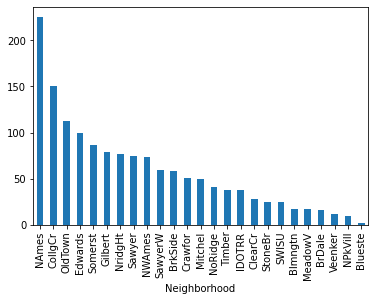

In [67]:
data.groupby('Neighborhood')['SalePrice'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()

In [53]:
X = data.drop('SalePrice', axis =1)
y = data['SalePrice']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7, random_state = 100)

In [56]:
from feature_engine.encoding import RareLabelEncoder

In [57]:
rare_enc = RareLabelEncoder(tol = 0.05, n_categories = 4)

In [59]:
rare_enc.fit(X_train)

RareLabelEncoder(n_categories=4)

In [60]:
rare_enc.transform(X_train)

,Neighborhood,Exterior1st,Exterior2nd,MasVnrType,ExterQual,BsmtCond
318,Rare,HdBoard,HdBoard,BrkFace,Gd,TA
239,Edwards,VinylSd,VinylSd,None,TA,Fa
986,OldTown,VinylSd,VinylSd,None,TA,Fa
1416,OldTown,VinylSd,Rare,None,TA,TA
390,Edwards,MetalSd,MetalSd,None,TA,Gd
...,...,...,...,...,...,...
802,CollgCr,Rare,Rare,None,Gd,TA
53,Rare,Rare,Rare,None,Gd,TA
350,NridgHt,MetalSd,MetalSd,BrkFace,Ex,TA
79,OldTown,Wd Sdng,Wd Sdng,None,TA,TA


In [68]:
X_train = rare_enc.transform(X_train)
X_test = rare_enc.transform(X_test)

In [69]:
X_train.nunique()

Neighborhood    8
Exterior1st     6
Exterior2nd     6
MasVnrType      4
ExterQual       4
BsmtCond        4
dtype: int64

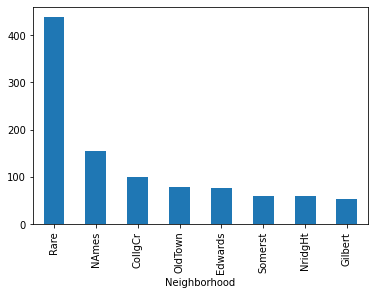

In [70]:
pd.concat([X_train,y_train], axis = 1).groupby('Neighborhood')['SalePrice'].count().sort_values(ascending = False).plot(kind = 'bar')
plt.show()